# Class 7. Data Visulization, Reading Data from Web, Interactive Plotting

In these notebook the following topics are covered:
- **Reading data** by using <code>pandas</code> functions, 
- **Exploring dataframe** that was read by doing the following: 
    - Identifying information the data contains: name of columns, shape of data, etc.
    - Identifying missing values in the dataset: how many columns have missing values, number of missing values in each column, etc.
    - Dropping the columns that have missing values,
    - Dropping the rows that have at least one missing value,
    - Creating a dataset from only numeric variables, and creating a dataset from only string variables.
    - Visualising Dataset
- **Visualising data** by using functions from <code>matplotlib</code> and <code>seaborn</code> modules
- **Reading data directly from web**: from *Quandl* and from *Yahoo Finance*
- **Interactive Plotting** by using <code>plotly</code> module


> You need to install <code>quandl</code>, <code>pandas_datareader</code>,<code>plotly</code> modules before importing them. If you are installing these modules through *Command Prompt/Anaconda Prompt*, use the following code - <code>pip install quandl</code>, if you are installing them inside Jupyter Notebook, use the following code: <code>!pip install quandl</code>.

*In Jupyter Notebook, run the following lines of codes before starting using plotly, quandl, pandas_datareader modules:*

>  - !pip install quandl  
>  - !pip install plotly 
>  - !pip install pandas_datareader 

**! Note** Before starting coding, always make sure to import libraries in the beginning of your script

In [1]:
import pandas as pd #for reading and working with data
import matplotlib.pyplot as plt #for visuals
import seaborn as sns #for visuals
import numpy as np #for doing math/stat calculations, working with arrays

import quandl #for downloading data from Quandl website
from pandas_datareader import data #for downloading data from Yahoo Finance website

##plotly is for interactive plotting
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go #the basic charts that we will use are mainly stored under graph_objs
init_notebook_mode(connected=True) #if we want the charts to be displayed in JN

# Reading data

In [2]:
data_car=pd.read_excel('car_sales.xls')

# Exploring Data

> Before visualising the data, first we need to explore it to understand what are the variables in data, how many missing values there are, handle missing values.

In [3]:
#looking at the head of data
data_car.head()

,ID,manufact,type,fuel_cap,sales,model,resale,price,horsepow,width,length
0,1,Acura,Automobile,13.2,16.919,Integra,16.360,21.50,140.0,67.3,172.4
1,2,Acura,Automobile,17.2,39.384,TL,19.875,28.40,225.0,70.3,192.9
2,3,Acura,Automobile,17.2,14.114,CL,18.225,NaN,225.0,70.6,192.0
3,4,Acura,Automobile,18.0,8.588,RL,29.725,42.00,210.0,71.4,196.6
4,5,Audi,Automobile,16.4,20.397,A4,22.255,23.99,150.0,68.2,178.0


In [4]:
#let's see how many observation are there in each variabl, i.e. how many rows in each variable

data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        159 non-null    int64  
 1   manufact  159 non-null    object 
 2   type      157 non-null    object 
 3   fuel_cap  158 non-null    float64
 4   sales     157 non-null    float64
 5   model     159 non-null    object 
 6   resale    121 non-null    float64
 7   price     157 non-null    float64
 8   horsepow  158 non-null    float64
 9   width     158 non-null    float64
 10  length    158 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 13.8+ KB


> **Interpretation of the output above:** There are 11 variables in the dataset, which can be divided into two types of variables: numeric (float, integer) and string (object). Two columns (ID, manufact) have 159 observations (rows) while others have less.

In [5]:
data_car.shape

(159, 11)

> **There are 159 rows and 11 columns in the dataset.**

In [6]:
# getting list of column names in the dataset
data_car.columns

Index(['ID', 'manufact', 'type', 'fuel_cap', 'sales', 'model', 'resale',
       'price', 'horsepow', 'width', 'length'],
      dtype='object')

### Checking for Missing Values

In [7]:
#let's check for missing values
data_car.isna().any()

ID          False
manufact    False
type         True
fuel_cap     True
sales        True
model       False
resale       True
price        True
horsepow     True
width        True
length       True
dtype: bool

> **Only** three variables don't have missing values.

In [8]:
#printing how many missing values are in each column

data_car.isnull().sum()

ID           0
manufact     0
type         2
fuel_cap     1
sales        2
model        0
resale      38
price        2
horsepow     1
width        1
length       1
dtype: int64

> **resale** has has 38 missing values while other variables have from 1 to 2 missings. Therefore let's drop resale column first, then drop rows which have missing values.resale has 38 missing values, while other vars have up to 2.

In [9]:
#dropping column resale
data_car.drop(columns=['resale'],axis=1,inplace=True)

#looking at the new list of column names without resale
data_car.columns

Index(['ID', 'manufact', 'type', 'fuel_cap', 'sales', 'model', 'price',
       'horsepow', 'width', 'length'],
      dtype='object')

In [10]:
#now let's drop rows, which have at least one missing value in any of the columns

data_car.dropna(inplace=True)

In [11]:
#checking for missing values again
data_car.isnull().sum()

ID          0
manufact    0
type        0
fuel_cap    0
sales       0
model       0
price       0
horsepow    0
width       0
length      0
dtype: int64

> **No missing values in any of the columns**

### Dividing data into numeric and object type subsets

In [12]:
data_numeric=data_car.select_dtypes(exclude='object')
data_numeric.head()

,ID,fuel_cap,sales,price,horsepow,width,length
0,1,13.2,16.919,21.50,140.0,67.3,172.4
1,2,17.2,39.384,28.40,225.0,70.3,192.9
3,4,18.0,8.588,42.00,210.0,71.4,196.6
4,5,16.4,20.397,23.99,150.0,68.2,178.0
5,6,18.5,18.780,33.95,200.0,76.1,192.0


In [13]:
data_object=data_car.select_dtypes(include='object')
data_object.columns

Index(['manufact', 'type', 'model'], dtype='object')

In [14]:
print("Columns in data numeric dataset: ", data_numeric.columns)
print('Columns in data object dataset:', data_object.columns)

Columns in data numeric dataset:  Index(['ID', 'fuel_cap', 'sales', 'price', 'horsepow', 'width', 'length'], dtype='object')
Columns in data object dataset: Index(['manufact', 'type', 'model'], dtype='object')


# Descriptive statistics about data

In [15]:
data_numeric.describe()

,ID,fuel_cap,sales,price,horsepow,width,length
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,79.780645,17.956774,53.245832,27.390755,185.696774,71.153548,187.313548
std,45.196723,3.900050,68.397550,14.351653,56.796444,3.462776,13.470034
min,1.000000,10.300000,0.110000,9.235000,55.000000,62.600000,149.400000
25%,41.500000,15.800000,14.074500,18.017500,149.000000,68.400000,177.550000
50%,80.000000,17.200000,29.450000,22.799000,175.000000,70.500000,187.800000
75%,118.500000,19.650000,68.183500,31.947500,215.000000,73.450000,196.150000
max,157.000000,32.000000,540.561000,85.500000,450.000000,79.900000,224.500000


> From the table above we can see that maybe there is indication of skewness in price of cars because average price is about 27.4 while highest is 85.5, as well as sales seem to have skewed distribution, therefore we should consider visualising distributions of these variables in the visualisation section of this analysis.

In [16]:
#description of only one column
data_numeric['ID'].describe()

count    155.000000
mean      79.780645
std       45.196723
min        1.000000
25%       41.500000
50%       80.000000
75%      118.500000
max      157.000000
Name: ID, dtype: float64

In [17]:
#calculationg quantile with only one function
data_numeric.sales.quantile(0.25)
np.percentile(data_numeric.sales,25)

14.0745

# Poll Question

> **How many cars have manufacture type as "Ford"?**

In [18]:
data_object[data_object['manufact']=='Ford'].count()

manufact    11
type        11
model       11
dtype: int64

In [19]:
data_object.type.value_counts()

Automobile    115
Truck          40
Name: type, dtype: int64

### Printing number of entries/observations for each category of each object-type variable

In [20]:
for i in data_object.columns:
    print(i)
    print('\n')
    print(data_object[i].value_counts())
    print('-------------------------------')

manufact


Dodge            11
Ford             11
Toyota            9
Mercedes-Benz     9
Chevrolet         9
Mitsubishi        7
Nissan            7
Volkswagen        6
Lexus             6
Mercury           6
Oldsmobile        6
Chrysler          6
Pontiac           6
Volvo             6
Cadillac          5
Honda             5
Saturn            5
Buick             4
Plymouth          4
Lincoln           3
Jeep              3
Porsche           3
BMW               3
Audi              3
Hyundai           3
Acura             3
Subaru            2
Saab              2
Jaguar            1
Infiniti          1
Name: manufact, dtype: int64
-------------------------------
type


Automobile    115
Truck          40
Name: type, dtype: int64
-------------------------------
model


Neon             2
Accord           1
SLK              1
LHS              1
LS               1
                ..
RX300            1
Carrera Coupe    1
Passat           1
9-3              1
TL               1
Name: model

# Data Visualisation: Matplotlib, Seaborn

### Histogram

> **A frequency histogram shows the frequency distribution of the data**, i.e. how many times an outcome occurs in a data. It allows to organize data and not only to see the distribution type of data (e.g. normal distribution) but also to observe skewness, outliers, etc.

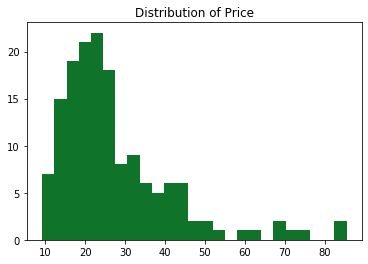

In [21]:
plt.hist(data_numeric.price,
         color='#0f732a',
         bins=25
        )

plt.title("Distribution of Price")

plt.show()

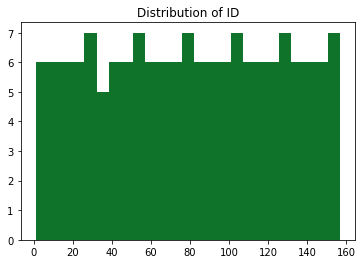

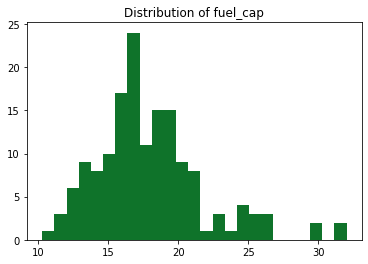

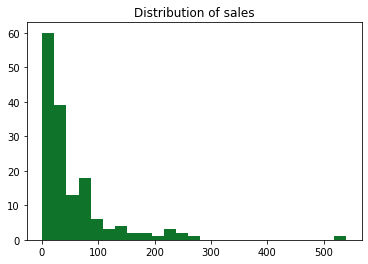

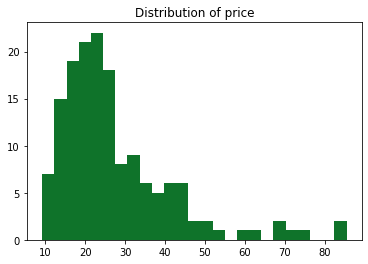

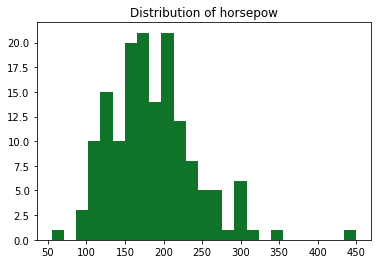

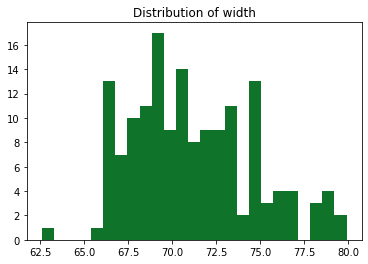

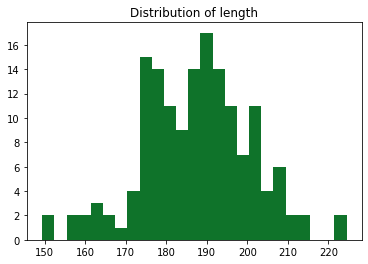

In [22]:
#printing histograms for all numeric variables by using for loop
for i in data_numeric.columns:
    plt.hist(data_numeric[i],
         color='#0f732a',
         bins=25
        )
    plt.title(f"Distribution of {i}")
    plt.show()

### Scatter Plot

> **Scatter plots are used to visualize the relationship between two variables** by using dots to plot the values of two variables along the x-axis and the y-axis.

- Scatter plots require at least two arguments: X-axis values and Y-axis values, therefore be careful in  functions to use two variables.

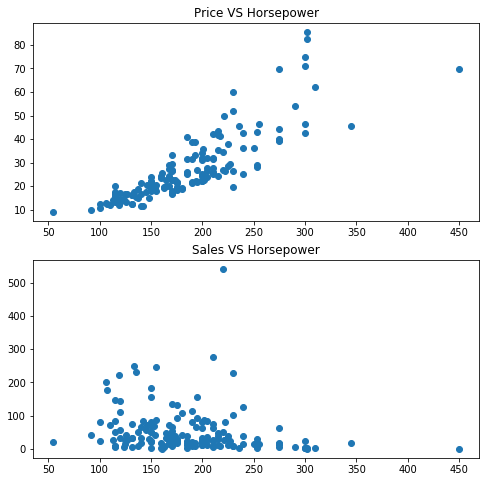

In [23]:
plt.figure(figsize=(8,8)) #changing the size of figure

plt.subplot(2,1,1) #first plot when plotting to figures side by side, or under each other
plt.scatter(data_numeric.horsepow, #X-axis values
            data_numeric.price #Y-axis values
           )

plt.title("Price VS Horsepower") #title of the first chart


plt.subplot(2,1,2) #second plot
plt.scatter(data_numeric.horsepow, #X-axis values
            data_numeric.sales #Y-axis values
           )

plt.title("Sales VS Horsepower") #title of second chart

plt.show()

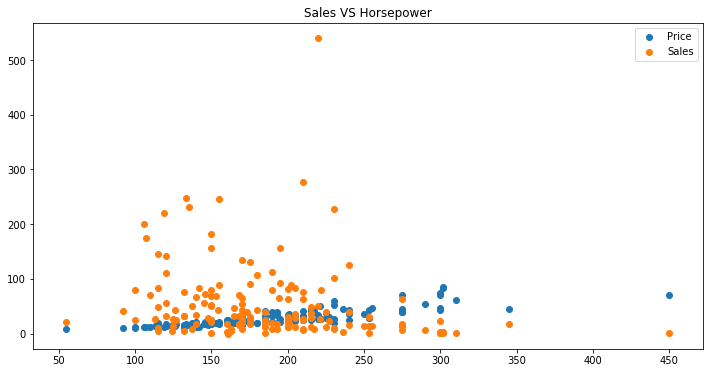

In [24]:
plt.figure(figsize=(12,6)) #changing the chart size

plt.scatter(data_numeric.horsepow,
            data_numeric.price,
            label='Price'
           )

plt.title("Price VS Horsepower")


plt.scatter(data_numeric.horsepow,
            data_numeric.sales,
            label='Sales'
           )

plt.legend() #showing legend on the chart: Price, Sales

plt.title("Sales VS Horsepower")

plt.show()

# Seaborn

> ### Seaborn ia a data visualization library with a high-level interface.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



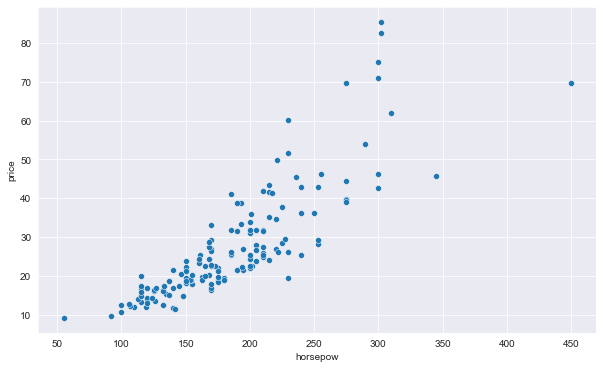

In [25]:
plt.figure(figsize=(10,6)) #figure size

sns.set_style('darkgrid') #setting style for the charts

sns.scatterplot(data_numeric.horsepow, #X-axis values
            data_numeric.price #Y-axis values
               )

plt.show()

### Heatmap
> https://seaborn.pydata.org/generated/seaborn.heatmap.html

In this script, **Heatmap** is used to visualise correlations between all numeric variables in the dataset.

In [26]:
#first we need to create correlation table by using corr() function
data_numeric.corr().round(2)

,ID,fuel_cap,sales,price,horsepow,width,length
ID,1.00,-0.13,-0.13,-0.03,-0.20,-0.29,-0.31
fuel_cap,-0.13,1.00,0.09,0.42,0.50,0.66,0.56
sales,-0.13,0.09,1.00,-0.30,-0.20,0.14,0.26
price,-0.03,0.42,-0.30,1.00,0.84,0.33,0.16
horsepow,-0.20,0.50,-0.20,0.84,1.00,0.54,0.39
width,-0.29,0.66,0.14,0.33,0.54,1.00,0.71
length,-0.31,0.56,0.26,0.16,0.39,0.71,1.00


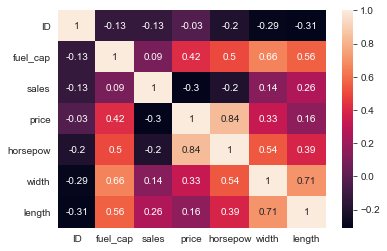

In [27]:
#the argument of the heatmap is a correlation atble created in the cell above
sns.heatmap(data_numeric.corr().round(2) #corr table
           ,annot=True #to show corr values on the cells on the chart below
           )

plt.show()

> *Interpretation example*: **Price and horsepower have the highest correlation among all numeric variables.**

### Visualising distribution plots in Seaborn

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



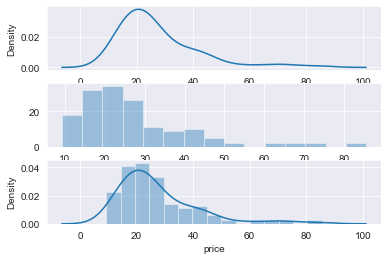

In [28]:
plt.subplot(3,1,1)
sns.distplot(data_numeric.price, hist=False) #only density plot

plt.subplot(3,1,2)
sns.distplot(data_numeric.price, hist=True, kde=False) #only histogram

plt.subplot(3,1,3)
sns.distplot(data_numeric.price) #both density plot and histogram on the same chart

plt.show()

## Box plots

The another type of distribution chart graph is a box plot. **Box plot uses five measures to describe how the data is distributed: minimum, first quartile, median, third quartile, and maximum.** It is generally very useful tool to detect **outliers** in the data.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.



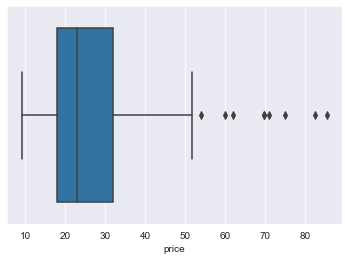

In [29]:
#visualising boxplot for price
sns.boxplot(data_numeric.price, orient='v')

plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



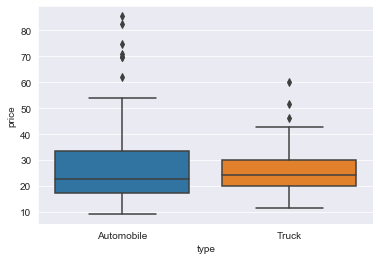

In [30]:
#boxplot for price by categories of "type" variable
sns.boxplot(data_car.type, 
           data_car.price,
           orient='v')

plt.show()

> **Interpretation example**: Median price is lower in case of automobiles compared to trucks. There are more outliers in automobiles.

# Data from Web

## Quandl

**Quandl** is a marketplace for financial, economic and alternative data delivered in modern formats for today's analysts, including Python, Excel, Matlab, R.

Gettting data from quandl:

- Check available data in quandl webpage (https://www.quandl.com/),
- Write the code in JN with the following logic: "Source of Data" then put "/" then name of a measure.

In [31]:
#getting USA GDP
data_gdp=quandl.get("ODA/USA_NGDP",
                    authtoken="1G3FoWaBrbMgwREZMNWt", #your API, use this if you are registered in Quandl
                   )
data_gdp.head()

,Value
Date,
1980-12-31,2857.33
1981-12-31,3207.03
1982-12-31,3343.80
1983-12-31,3634.03
1984-12-31,4037.65


In [32]:
data_gdp.tail()

,Value
Date,
2020-12-31,22198.12
2021-12-31,23059.65
2022-12-31,23922.82
2023-12-31,24812.96
2024-12-31,25728.73


In [33]:
data_gdp=quandl.get("ODA/USA_NGDP",
                   start_date='1994-01-01', end_date='2020-12-31', #defining time period
                    order='desc',
                    authtoken="1G3FoWaBrbMgwREZMNWt", #your API, use this if you are registered in Quandl
                   collapse='daily' #to be used if applicable, in this example there is no daily data
                   )
data_gdp.head()

,Value
Date,
2020-12-31,22198.12
2019-12-31,21344.67
2018-12-31,20494.05
2017-12-31,19485.40
2016-12-31,18707.15


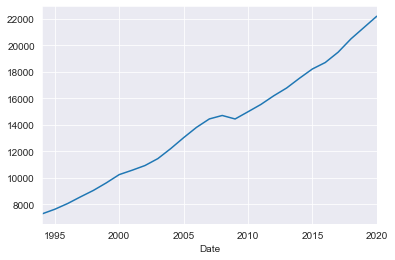

In [34]:
data_gdp.Value.plot()

plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



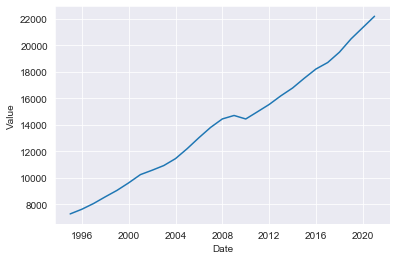

In [35]:
#visualising time-series data
sns.lineplot(data_gdp.index, data_gdp.Value)

plt.show()

## Data from Yahoo Finance

**From pandas_datareader.data use <code>DataReader()</code> function.**

There’re some limitations by making the call to Yahoo Finance API:

- Using the Public API, you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).
- When importing many tickers, use time.sleep(1) (python time module) function to avoid your IP getting blocked

Use <code>?data.DataReader</code> to see more about <code>DataReader()</code> function.

In [36]:
data_dis=data.DataReader(name='DIS', #ticker of staock
                        data_source='yahoo', #source of data, for example 'fred' is another data source
                        start='2020-01-01', end='2021-01-01', #time period
                        pause=1 # to puase some time in seconds after each request to Yahoo, in order not to get blocked
                        )

In [37]:
#let's take a look at data
data_dis.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,148.199997,145.100006,145.289993,148.199997,9502100,148.199997
2020-01-03,147.899994,146.050003,146.399994,146.500000,7320200,146.500000
2020-01-06,146.029999,144.309998,145.539993,145.649994,8262500,145.649994
2020-01-07,146.869995,145.419998,145.990005,145.699997,6906500,145.699997
2020-01-08,146.130005,144.820007,145.490005,145.399994,6984200,145.399994


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



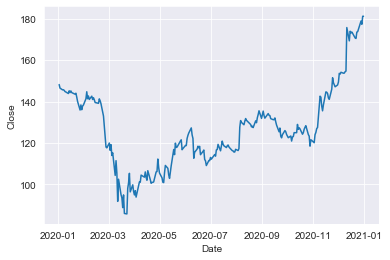

In [38]:
#time series chart
sns.lineplot(data_dis.index, data_dis.Close)

plt.show()

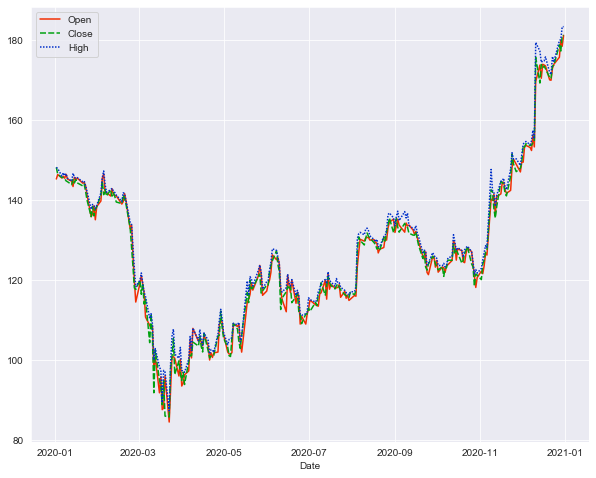

In [39]:
#few lines on one chart
plt.figure(figsize=(10,8))

sns.lineplot(data=data_dis[['Open',"Close","High"]],
            palette=['#f22e02','#00a110','#002fc9'])

plt.show()

# Plotly

The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

Built on top of the Plotly JavaScript library (plotly.js), plotly enables Python users to create beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks, saved to standalone HTML files, or served as part of pure Python-built web applications using Dash. The plotly Python library is sometimes referred to as "plotly.py" to differentiate it from the JavaScript library.

In Jupyter Notebook you can plot in Plotly via different ways:

**Online**

- Inside JupyterNotebook (from plotly.plotly import iplot)

- Not in JupyterNotebook (from plotly.plotly import plot)

**Offline**

- <code>Inside JupyterNotebook (from plotly.offline import iplot)</code>
- <code>Not in JupyterNotebook (from plotly.offline import plot)</code>

In case of plotting inside the Notebook (using iplot), the following line of code must be executed, to show the plot inline:

- <code>from plotly.offline import init_notebook_mode</code>
- <code>init_notebook_mode(connected=True)</code>

Use <code>go.Scatter()</code> function to create  line charts, scatter charts, text charts, and bubble charts: https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scatter.html

In [40]:
#first, create a data that plotly will understand
data_obj=go.Scatter(x=data_dis.index, y=data_dis.Close,
                   mode='lines')

In [41]:
#here is the data format that plotly understands
data_obj

Scatter({
    'mode': 'lines',
    'x': array([datetime.datetime(2020, 1, 2, 0, 0),
                datetime.datetime(2020, 1, 3, 0, 0),
                datetime.datetime(2020, 1, 6, 0, 0), ...,
                datetime.datetime(2020, 12, 29, 0, 0),
                datetime.datetime(2020, 12, 30, 0, 0),
                datetime.datetime(2020, 12, 31, 0, 0)], dtype=object),
    'y': array([148.19999695, 146.5       , 145.6499939 , ..., 177.30000305,
                181.16999817, 181.17999268])
})

In [42]:
#Use go.Figure() function to visualise created data: data_obj
fig_one=go.Figure(data_obj)

fig_one.show() #to show the chart

In [43]:
#creating two data objects for close and open prices
data_obj_close=go.Scatter(x=data_dis.index, y=data_dis.Close,
                   mode='lines', name='Close')

data_obj_open=go.Scatter(x=data_dis.index, y=data_dis.Open,
                   mode='lines', name='Open')

In [44]:
#you can either input data objects created in cell above or directly write go.Scatter() function inside 
fig_close_open=go.Figure()

fig_close_open.add_trace(go.Scatter(x=data_dis.index, y=data_dis.Close,
                   mode='lines', name='Close'))

fig_close_open.add_trace(go.Scatter(x=data_dis.index, y=data_dis.Open,
                   mode='lines', name='Open'))

fig_close_open.show()

In [45]:
#use go.Candlestick() to create candlestick chart

data_cand_obj=go.Candlestick(x=data_dis.index,
                             open=data_dis.Open,
                             close=data_dis.Close,
                             low=data_dis.Low,
                             high=data_dis.High)

fig_cand=go.Figure(data_cand_obj)

fig_cand.show()

In [46]:
#creating a list from multiple stock names
tickers=['AAPL','MSFT','DIS']

In [47]:
#downloading stock data for multiple tickers from Yahoo
data_stocks=data.DataReader(name=tickers,
                           data_source='yahoo',
                           start='2020-01-01',
                           end='2021-01-01',
                           pause=0.1
                           )

In [48]:
#first five rows of data
data_stocks.head()

Attributes  Adj Close                              Close              \
Symbols          AAPL        MSFT         DIS       AAPL        MSFT   
Date                                                                   
2020-01-02  74.207466  158.205765  148.199997  75.087502  160.619995   
2020-01-03  73.486023  156.235825  146.500000  74.357498  158.619995   
2020-01-06  74.071579  156.639694  145.649994  74.949997  159.029999   
2020-01-07  73.723213  155.211456  145.699997  74.597504  157.580002   
2020-01-08  74.909149  157.683731  145.399994  75.797501  160.089996   

Attributes                   High                                Low  \
Symbols            DIS       AAPL        MSFT         DIS       AAPL   
Date                                                                   
2020-01-02  148.199997  75.150002  160.729996  148.199997  73.797501   
2020-01-03  146.500000  75.144997  159.949997  147.899994  74.125000   
2020-01-06  145.649994  74.989998  159.100006  146.029999  73.187500   
2020-01-07  145.699997  75.224998  159.669998  146.869995  74.370003   
2020-01-08  145.399994  76.110001  160.800003  146.130005  74.290001   

Attributes                               Open                          \
Symbols           MSFT         DIS       AAPL        MSFT         DIS   
Date                                                                    
2020-01-02  158.330002  145.100006  74.059998  158.779999  145.289993   
2020-01-03  158.059998  146.050003  74.287498  158.320007  146.399994   
2020-01-06  156.509995  144.309998  73.447502  157.080002  145.539993   
2020-01-07  157.320007  145.419998  74.959999  159.320007  145.990005   
2020-01-08  157.949997  144.820007  74.290001  158.929993  145.490005   

Attributes       Volume                         
Symbols            AAPL        MSFT        DIS  
Date                                            
2020-01-02  135480400.0  22622100.0  9502100.0  
2020-01-03  146322800.0  21116200.0  7320200.0  
2020-01-06  118387200.0  20813700.0  8262500.0  
2020-01-07  108872000.0  21634100.0  6906500.0  
2020-01-08  132079200.0  27746500.0  6984200.0

In [49]:
data_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-02 to 2020-12-31
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  253 non-null    float64
 1   (Adj Close, MSFT)  253 non-null    float64
 2   (Adj Close, DIS)   253 non-null    float64
 3   (Close, AAPL)      253 non-null    float64
 4   (Close, MSFT)      253 non-null    float64
 5   (Close, DIS)       253 non-null    float64
 6   (High, AAPL)       253 non-null    float64
 7   (High, MSFT)       253 non-null    float64
 8   (High, DIS)        253 non-null    float64
 9   (Low, AAPL)        253 non-null    float64
 10  (Low, MSFT)        253 non-null    float64
 11  (Low, DIS)         253 non-null    float64
 12  (Open, AAPL)       253 non-null    float64
 13  (Open, MSFT)       253 non-null    float64
 14  (Open, DIS)        253 non-null    float64
 15  (Volume, AAPL)     253 non-null    float64
 16  (Volume

In [50]:
data_stocks[('Adj Close', 'AAPL')].head()

Date
2020-01-02    74.207466
2020-01-03    73.486023
2020-01-06    74.071579
2020-01-07    73.723213
2020-01-08    74.909149
Name: (Adj Close, AAPL), dtype: float64

In [51]:
#column headings are in a multirow format
data_stocks.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'MSFT'),
            ('Adj Close',  'DIS'),
            (    'Close', 'AAPL'),
            (    'Close', 'MSFT'),
            (    'Close',  'DIS'),
            (     'High', 'AAPL'),
            (     'High', 'MSFT'),
            (     'High',  'DIS'),
            (      'Low', 'AAPL'),
            (      'Low', 'MSFT'),
            (      'Low',  'DIS'),
            (     'Open', 'AAPL'),
            (     'Open', 'MSFT'),
            (     'Open',  'DIS'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'MSFT'),
            (   'Volume',  'DIS')],
           names=['Attributes', 'Symbols'])

In [52]:
#in order to have only one row of headings, let's join two headings with "_"
data_stocks.columns=data_stocks.columns.map('_'.join)

In [53]:
data_stocks.head()

,Adj Close_AAPL,Adj Close_MSFT,Adj Close_DIS,Close_AAPL,Close_MSFT,Close_DIS,High_AAPL,High_MSFT,High_DIS,Low_AAPL,Low_MSFT,Low_DIS,Open_AAPL,Open_MSFT,Open_DIS,Volume_AAPL,Volume_MSFT,Volume_DIS
Date,,,,,,,,,,,,,,,,,,
2020-01-02,74.207466,158.205765,148.199997,75.087502,160.619995,148.199997,75.150002,160.729996,148.199997,73.797501,158.330002,145.100006,74.059998,158.779999,145.289993,135480400.0,22622100.0,9502100.0
2020-01-03,73.486023,156.235825,146.500000,74.357498,158.619995,146.500000,75.144997,159.949997,147.899994,74.125000,158.059998,146.050003,74.287498,158.320007,146.399994,146322800.0,21116200.0,7320200.0
2020-01-06,74.071579,156.639694,145.649994,74.949997,159.029999,145.649994,74.989998,159.100006,146.029999,73.187500,156.509995,144.309998,73.447502,157.080002,145.539993,118387200.0,20813700.0,8262500.0
2020-01-07,73.723213,155.211456,145.699997,74.597504,157.580002,145.699997,75.224998,159.669998,146.869995,74.370003,157.320007,145.419998,74.959999,159.320007,145.990005,108872000.0,21634100.0,6906500.0
2020-01-08,74.909149,157.683731,145.399994,75.797501,160.089996,145.399994,76.110001,160.800003,146.130005,74.290001,157.949997,144.820007,74.290001,158.929993,145.490005,132079200.0,27746500.0,6984200.0


In [54]:
#interactive chart of Close prices for stocks
fig=go.Figure()

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_AAPL,
                        mode='lines',
                        name='Close Price of AAPL'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_DIS,
                        mode='lines',
                        name='Close Price of DIS'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Close_MSFT,
                        mode='lines',
                        name='Close Price of MSFT'))

fig.update_layout(title='Comparison of Close Prices Between Stocks')

fig.show()
